In [2]:
import numpy as np
# ^^^ pyforest auto-imports - don't write above this line
import scipy.io
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rcParams
import statistics
from scipy.signal import hilbert

In [3]:
data = np.load("emg.npy")
print(data.shape)
print(len(data[0][0]))
print(len(data[0][0][0]))

temp=data[0][0]

(9, 3)
75
5000


# LEARNING SUBPLOT

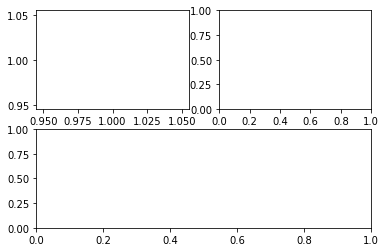

In [4]:
fig = plt.figure()
#fig.add_subplot(211)#2 rows and 1 column aur us ka 1st element
ax1 = fig.add_subplot(221)#2 rows and 2 columns aur us ka 1st element
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(212)

x=np.ones((3,3))
y=np.ones((3,3))
ax1.plot(x,y)
plt.show()

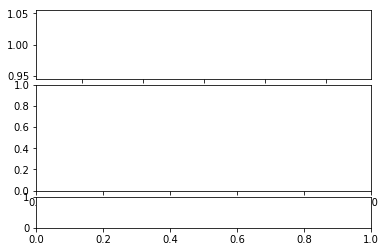

In [5]:
ax1=plt.subplot2grid(shape=(6,1),loc=(0,0),rowspan=2,colspan=1)#ye wala plot 2 rows pe aye ga out of 6
ax2=plt.subplot2grid(shape=(6,1),loc=(2,0),rowspan=3,colspan=1)
ax3=plt.subplot2grid(shape=(6,1),loc=(5,0),rowspan=1,colspan=1)
x=np.ones((3,3))
y=np.ones((3,3))
ax1.plot(x,y)
plt.show()

# DONE

In [6]:
#ROUNDING OFF TO 4 DIGITS
a=[]
for i in temp:
    a.append([round(num, 4) for num in list(i)])
print(len(a))
print(len(a[0]))

75
5000


In [7]:
#FINDING MEAN AND STANDARD DEVIATION
mx=[] 
std_dev=[]
for i,j in enumerate(a):
    mx.append(statistics.mean(j))
    var=0
    for val in j:
        var +=(float(mx[i])-float(val))
    std_dev.append(var/len(j)-1)
sum_list=[]
sub_list=[]
for (item1, item2) in zip(mx, std_dev):
    sum_list.append(item1+item2)
for (item1, item2) in zip(mx, std_dev):
    sub_list.append(item1-item2)

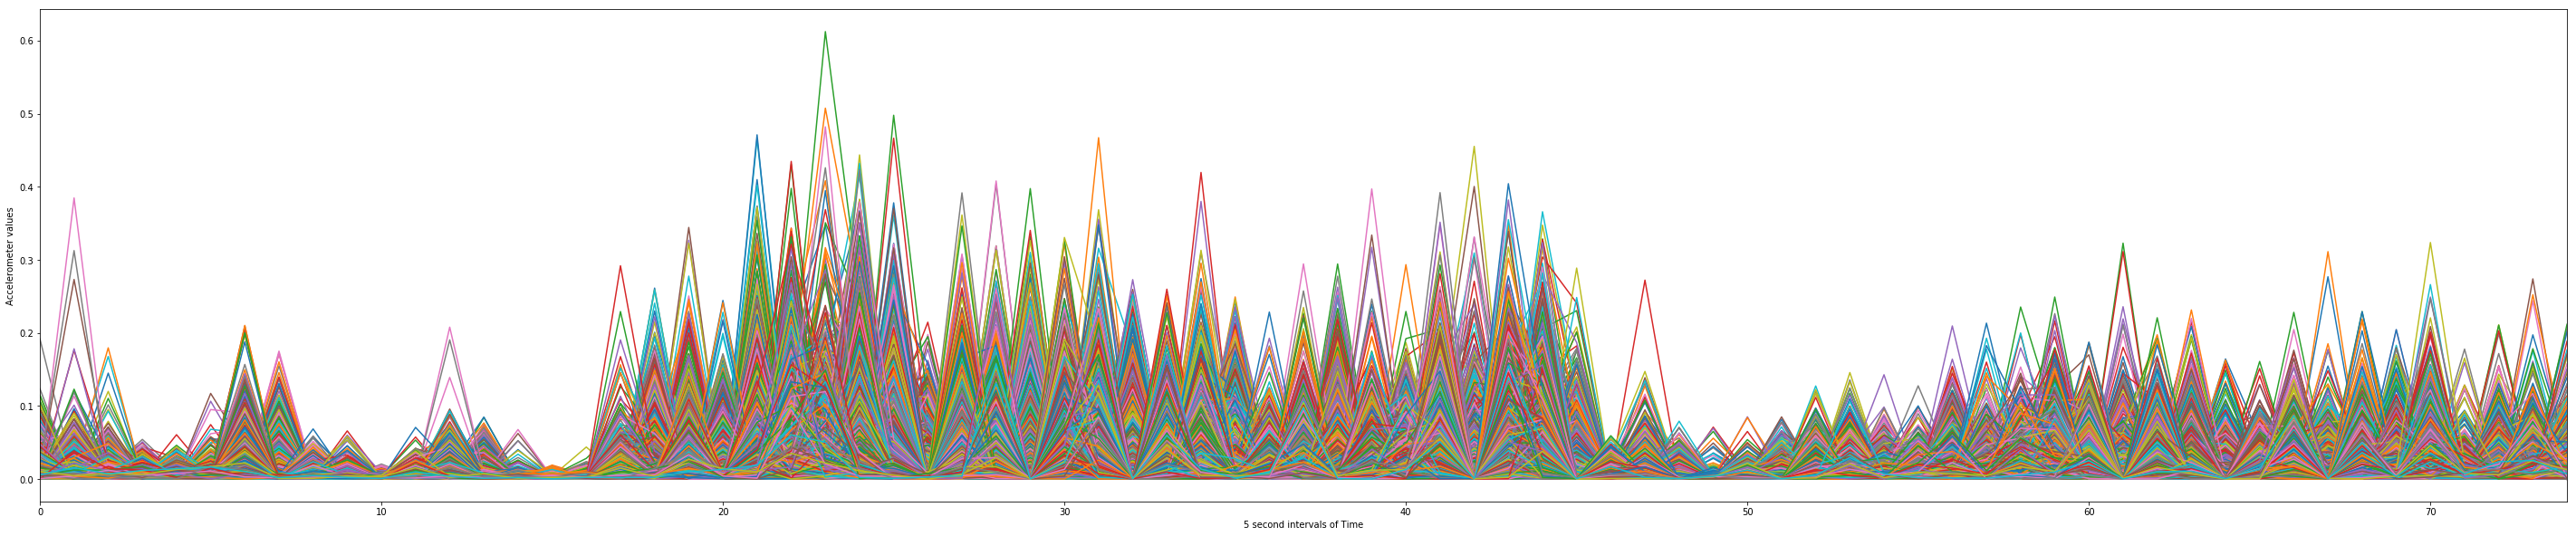

In [8]:
#Plotting Actual Signal
rcParams['figure.figsize'] = 50,10

plt.plot(a)
plt.xlim([0, len(a)-1])
plt.xlabel("5 second intervals of Time")
plt.ylabel("Accelerometer values")
#plt.show()
plt.savefig('actual_plot.png', dpi = 300)

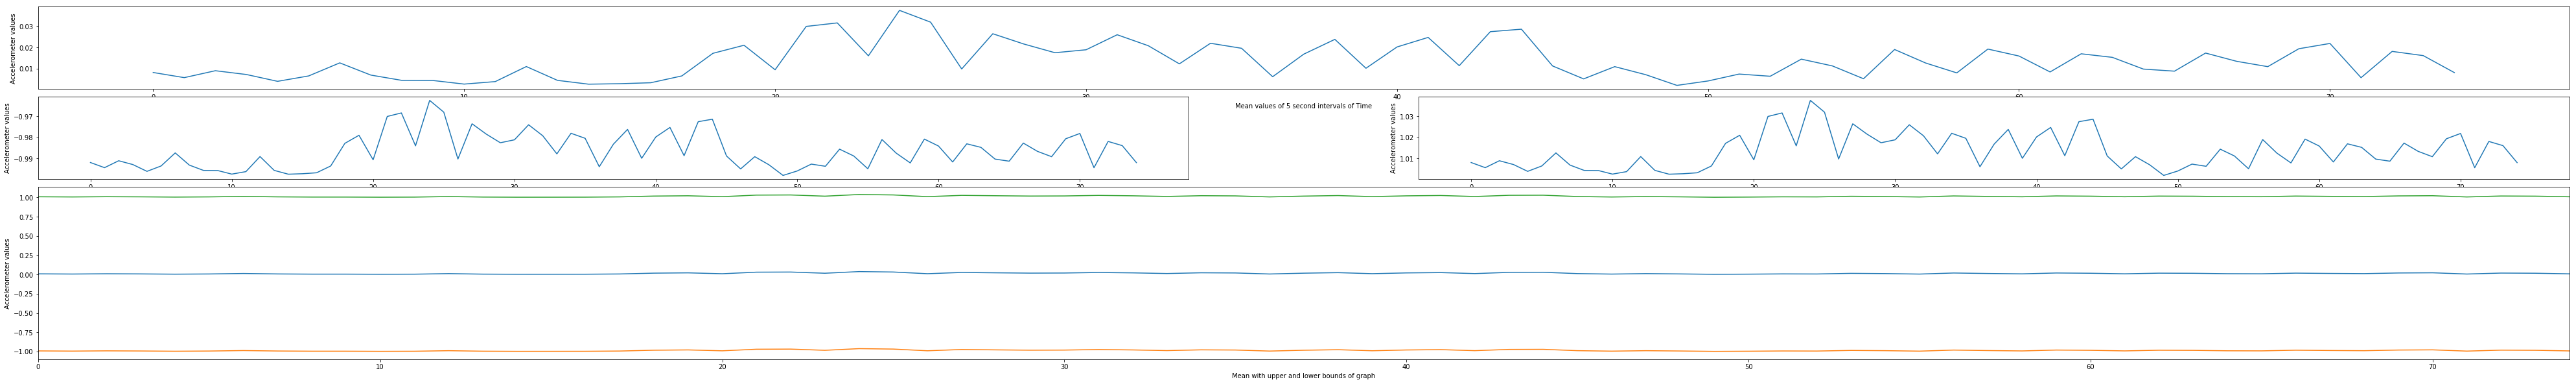

In [9]:
rcParams['figure.figsize'] = 70,10

ax1=plt.subplot2grid(shape=(8,1),loc=(0,0),rowspan=2,colspan=1)#ye wala plot 2 rows pe aye ga out of 8
ax2=plt.subplot2grid(shape=(8,2),loc=(2,0),rowspan=2,colspan=1)
ax3=plt.subplot2grid(shape=(8,2),loc=(2,1),rowspan=2,colspan=1)
ax4=plt.subplot2grid(shape=(8,1),loc=(4,0),rowspan=4,colspan=1)

ax1.plot(mx)
ax1.set_xlabel('Mean values of 5 second intervals of Time')
ax1.set_ylabel("Accelerometer values")
plt.xlim([0, len(a)-1])
ax2.plot(sum_list)
ax2.set_xlabel('Mean + standard deviation')
ax2.set_ylabel("Accelerometer values")
plt.xlim([0, len(a)-1])
ax3.plot(sub_list)
ax3.set_xlabel('Mean - standard deviation')
ax3.set_ylabel("Accelerometer values")
plt.xlim([0, len(a)-1])
ax4.plot(mx)
ax4.plot(sum_list)
ax4.plot(sub_list)
ax4.set_xlabel('Mean with upper and lower bounds of graph')
ax4.set_ylabel("Accelerometer values")

plt.xlim([0, len(a)-1])
plt.savefig('mean_dev.png', dpi = 300)
#plt.show()

In [10]:
print((list(range(len(mx)))))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74]


In [11]:
import plotly.graph_objs as go

y = mx
x = list(range(len(mx)))
y_upper = sum_list
y_lower = sub_list


fig = go.Figure([go.Scatter(
        x=x,
        y=y,
        line=dict(color='rgb(0,100,80)'),
        mode='lines'),
    go.Scatter(
        x=x+x[::-1], # x, then x reversed
        y=y_upper+y_lower[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])
fig.show()

In [12]:
"""analytic_signal = hilbert(temp)
amplitude_envelope = np.abs(analytic_signal)

#plt.plot(sum_list, label='signal')
#plt.plot(sub_list, label='signal')
plt.plot(amplitude_envelope, label='envelope')
plt.xlabel("5 second time samples")
plt.ylabel("amplitude")
plt.xlim([0, len(a)-1])
plt.show()"""

'analytic_signal = hilbert(temp)\namplitude_envelope = np.abs(analytic_signal)\n\n#plt.plot(sum_list, label=\'signal\')\n#plt.plot(sub_list, label=\'signal\')\nplt.plot(amplitude_envelope, label=\'envelope\')\nplt.xlabel("5 second time samples")\nplt.ylabel("amplitude")\nplt.xlim([0, len(a)-1])\nplt.show()'

In [13]:
pu = []
gu =[]
for i in range(len(a)):
    pu.append(max(a[i]))
    gu.append(min(a[i]))

In [16]:
print(np.array(pu).shape)

(75,)


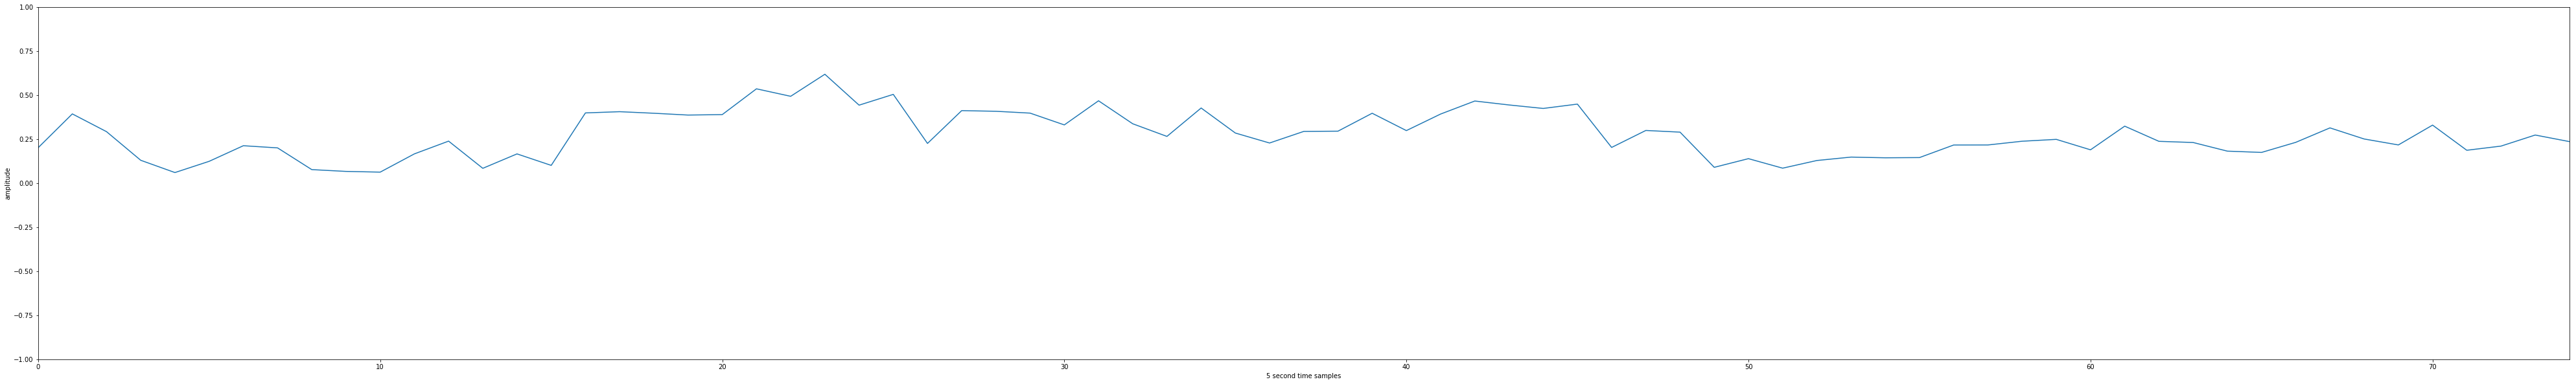

In [17]:
analytic_signal = hilbert(np.array(pu))
amplitude_envelope = np.abs(analytic_signal)
plt.plot(amplitude_envelope, label='envelope')
plt.xlabel("5 second time samples")
plt.ylabel("amplitude")
plt.xlim([0, len(a)-1])
plt.ylim([-1, +1])
plt.show()

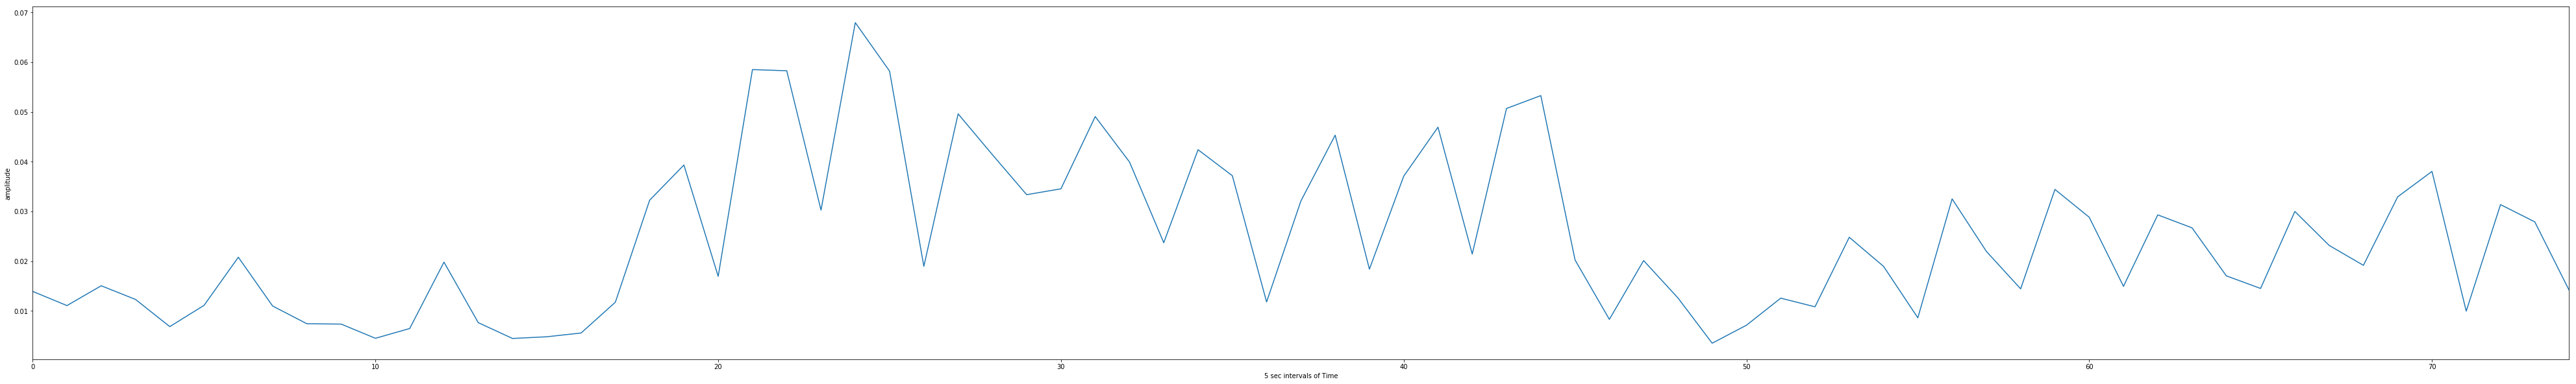

In [17]:
#plt.plot(sum_list, label='signal')
#plt.plot(pu, label='signal')
#plt.plot(gu, label='signal')
plt.plot(mx, label='signal')
plt.xlim([0, len(a)-1])
#plt.ylim([-.25, +.25])
plt.xlabel("5 sec intervals of Time")
plt.ylabel("amplitude")
plt.show()

In [15]:
y = mx
x = list(range(len(mx)))
y_upper = pu
y_lower = gu


fig = go.Figure([go.Scatter(
        x=x,
        y=y,
        line=dict(color='rgb(0,100,80)'),
        mode='lines'),
    go.Scatter(
        x=x+x[::-1], # x, then x reversed
        y=y_upper+y_lower[::-1], # upper, then lower reversed
        fill='toself',
        fillcolor='rgba(0,100,80,0.2)',
        line=dict(color='rgba(255,255,255,0)'),
        hoverinfo="skip",
        showlegend=False
    )
])
fig.show()